# Chapter 1: What is the Sea Ice Concentration Climate Data Record?
* **Creators:** Ann Windnagel and Robyn Marowitz
* **Affiliation:** [National Snow and Ice Data Center (NSIDC)](https://nsidc.org/home "National Snow and Ice Data Center")
* **History:**
  * 8 January 2025 - Initial version

## Introduction
Welcome to the Sea Ice Concentration (SIC) Climate Data Record (CDR) Learning Notebooks. This set of tutorials consists of six Jupyter Notebooks. After the completion of all Notebooks, you will know what the SIC CDR is, what a STAC catalog is, and how to access the SIC CDR from the STAC catalog so that you can interact with the data to compute sea ice extent, create graphs and plots, and compare the SIC CDR with other sea ice data and surface air temperature.

## Overview
In this notebook (Notebook 1), you will learn about sea ice and the sea ice concentration CDR as well as the format and contents of the netCDF data files. You will also be presented with an outline of what to expect in the other five notebooks.

## What is Sea Ice Concentration and Why is it Important?
Sea ice concentration is the fraction of ocean area covered by sea ice, usually described as a percentage. The ocean can be covered by thick sheets of unbroken ice with 100% coverage (Figure 1, right), by no sea ice (0% concentration), or partially covered with any concentration between 0 and 100. An example of partial coverage is pancake ice (Figure 1, left). Pancake ice forms when the ocean is beginning to freeze, but the surface is rough and choppy. The waves break up the thin layer of ice on the water's surface, causing the pieces to bump into each other and round off their edges giving them their characteristic pancake shape. Sea ice concentration changes throughout the year reaching a minimum in the summer (September for the Arctic, February/March for the Antarctic) and a maximum in the winter (March for the Arctic, September/October for the Antarctic). Figure 2 shows graphs of the sea ice minimum for the Arctic and Antarctic in 2023.

Understanding sea ice concentrations in the polar regions is critical to our understanding of the fitness of our planet in a warming world. The Arctic is like the canary in the coal mine for the health of Earth’s climate and is an early sign of the effects of climate change. The Arctic is warming faster than the rest of the globe, and one indicator of the enormous amount of transformation occurring there is the loss of sea ice. Sea ice is one of the most rapidly changing areas of the Arctic environment. Its loss impacts not just the Arctic region but the entire planet because it plays a critical role in regulating Earth’s climate and influences global weather patterns and ocean circulations. Because Arctic sea ice is light in color, it reflects most of the sunlight that hits the sea ice surface. This prevents too much heat from being absorbed into the ocean and helps to keep the region cool. However, as more sea ice is lost, more heat is absorbed by the ocean, which causes more melting. This amplifies warming, and the cycle continues. There are also noticeable changes in Antarctic sea ice, especially since 2016; and some scientists speculate a regime shift is occurring there as well. For these reasons, it is imperative that we monitor changes in sea ice and share information about the changes that are occurring.

<figure>
    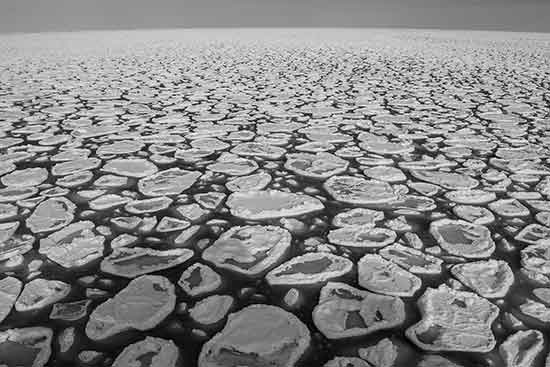
</figure>
<figure>
    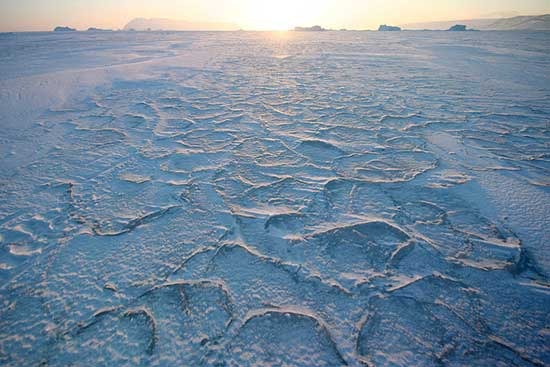
    <figcaption style="text-align: center"><strong>Figure 1.</strong> Pancake ice forms in the Arctic Ocean. (left) — <em>Credit: Glenn Grant/NSIDC</em> <br>Over time, as the ice continues to freeze, the ice solidifies into solid sheets (right) — <em>Credit: Andy Mahoney/NSIDC</em></figcaption>
</figure>

## What is the SIC CDR?
The [Version 4 NOAA/NSIDC Climate Data Record of Passive Microwave Sea Ice Concentration](https://nsidc.org/data/g02202/versions/4 "Version 4 Climate Data Record of Sea Ice Concentration Web Page") is a sea ice concentration data set that allows one to analyze and monitor the state of the sea ice in both the Arctic and Antarctic. This data set provides a Climate Data Record (CDR) of sea ice concentration (SIC) from passive microwave data. The CDR algorithm output is a rule-based combination of ice concentration estimates from two well-established algorithms: the NASA Team (NT) algorithm (Cavalieri et al. 1984) and NASA Bootstrap (BT) algorithm (Comiso 1986). The CDR is a consistent, daily and monthly time series of sea ice concentrations from 25 October 1978 through the most recent processing for both the north and south polar regions. All data are on a 25 km x 25 km grid. 

<div class="alert alert-block alert-info">
Note: In the SIC CDR, a 10% concentration threshold is used to define valid ice – any grid cell with a concentration of less than 10% is set to 0% (i.e. open ocean). A 15% cutoff is a common standard that has been in use for many years (Zwally et al., 1983); and in comparisons with other satellite data, has agreed well, on an average basis, with the observed ice (Cavalieri et al., 1991; Meier et al., 2003). However, there are indications that the Bootstrap algorithm can potentially detect ice at as low as 8% levels (Comiso and Nishio, 2008). To be conservative, a 10% cutoff was operationally chosen for the CDR data fields. The validity of the assumption that ice concentrations greater than 10% and less than 15% are good data depends on the character of the ice edge as well as ocean and atmospheric conditions. We recommend that users deriving total extent and area calculations continue to use a 15% cutoff because low concentrations have much higher uncertainties. To align with this recommendation, these notebooks will use the 15% threshold to define valid ice and will include code to further clip the data to this concentration.
</div>

<figure>
    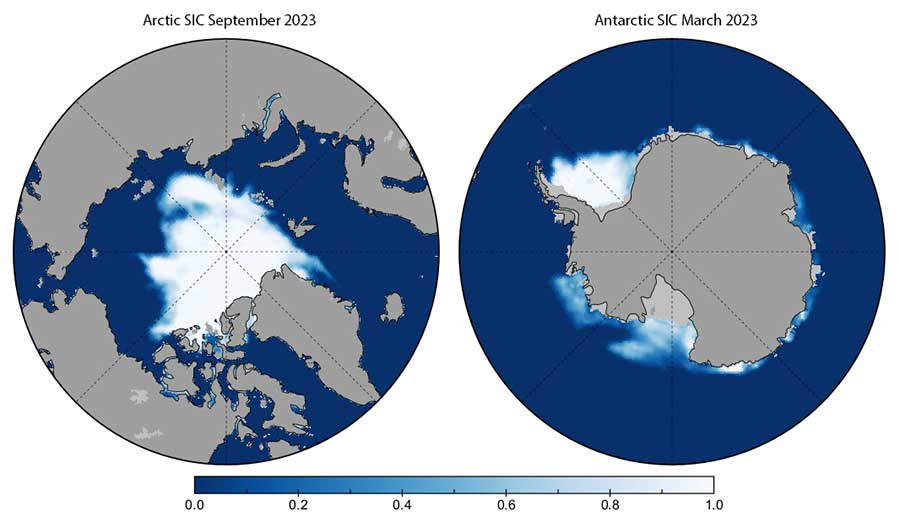
    <figcaption style="text-align: center"><strong>Figure 2.</strong> 2023 sea ice minimum for the Arctic (left) and Antarctic (right) from monthly averaged CDR sea ice concentration data. In the Arctic, the minimum happens in September at the end of the Northern Hemisphere summer. In the Antarctic, the minimum happens in February or March at the end of the Southern Hemisphere summer.</figcaption>
</figure>

## What is the Format and Content of the SIC CDR NetCDF Files?

### Data Format

The SIC CDR Version 4 data are provided in netCDF4 file format and are compliant with the Climate and Forecast (CF) Metadata Convention CF-1.6 and the Attribute Convention for Data Discovery (ACDD) 1.3.

[NetCDF](https://www.unidata.ucar.edu/software/netcdf/ "NetCDF Web Site"), or Network Common Data Form, "is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data" (Unidata 2024). Scientific data stored in netCDF files are meant to be self-describing in that the file should include information about the data it contains. This self-describing information is also known as attributes or metadata. NetCDF files are a type of multidimensional raster files, like GeoTIFF files.

The [CF metadata conventions](https://cfconventions.org/ "CF Metadata Conventions Web Site") are "designed to promote the processing and sharing" of netCDF files by defining "metadata that provide a definitive description of what the data in each variable represents and the spatial and temporal properties of the data"  (CF MetaData, 2024).

The [Attribute Convention for Data Discovery](https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3 "ACDD Web Site") conventions build upon the CF conventions and provides a list of global and variable attributes that are Highly Recommended, Recommended, and Suggested (ESIP, 2024).

### File Contents

The netCDF daily files contain 14 variables, and the monthly files contain 12. These learning notebooks will mainly focus on utilizing the `cdr_seaice_conc` and `cdr_seaice_conc_monthly` variables. The table below lists the names of all the variables in both the daily and montly files.

| Variable Name | Description |
| --- | --- |
| cdr_seaice_conc{_monthly} | NOAA/NSIDC sea Ice concentration CDR values |
| latitude | Latitude in degrees north of the projection grid centers |
| longitude | Latitude in degrees north of the projection grid centers |
| melt_onset_day_cdr_seaice_conc{_monthly?} | The day of year on which melting sea ice was first detected in each grid cell for the daily NOAA/NSIDC CDR (Northern Hemisphere only) |
| nsidc_bt_seaice_conc{_monthly} | NSIDC-processed Bootstrap sea ice concentrations |
| nsidc_nt_seaice_conc{_monthly} | NSIDC-processed NASA Team sea ice concentrations |
| projection | Geographic projection information for the data. |
| qa_of_cdr_seaice_conc{_monthly} | Quality flags related to the cdr_seaice_conc{_monthly} data |
| spatial_interpolation_flag | daily only: Marks the grid cells that were spatially interpolated |
| stdev_of_cdr_seaice_conc{_monthly} | Standard deviation for the cdr_seaice_conc{_monthly} |
| temporal_interpolation_flag | daily only: Marks the grid cells that were temporally interpolated |
| time | Time in days since 1601-01-01 00:00:00 |
| xgrid | X-offset in meters of the projection grid centers |
| ygrid | Y-offset in meters of the projection grid centers |

### Spatial and Temporal Coverage
The SIC CDR Version 4 covers both the Northern and Southern Hemisphere from approximately 31 °N to 90 °N and 40 °S to 90 °S, respectively. The data begin on 25 October 1978 and go through the present.

## Learning Objective

### Prerequisites

To successfully navigate these notebooks, you should be familiar with the basics of Python programming such as loading modules, assigning variables, and list/array indexing.

### Chapters

This set of learning journey notebooks is divided into the following chapters:
* Chapter 1: What is the Sea Ice Concentration Climate Data Record (Notebook 1, this notebook)
* Chapter 2: Explore STAC Catalog and Read NetCDF files using STAC (Notebook 2)
* Chapter 3: Mapping Sea Ice Concentration (Notebook 3)
* Chapter 4: Computing Sea Ice Extent and Plotting a Time Series Graph (Notebook 4)
* Chapter 5: Compare NOAA/NSIDC SIC CDR to Other SIC Data (Notebook 5)
* Chapter 6: Compare NOAA/NSIDC SIC with Surface Air Temperature (Notebook 6)

### Targeted level

These notebooks target a broad range of users.
* Notebook 1: All levels
* Notebook 2: Beginner
* Notebook 3: Beginner/Intermediate
* Notebook 4: Intermediate
* Notebook 5: Intermediate
* Notebook 6: Advanced

### Learning outcomes

* Completion of learning Notebooks 1, 2, and 3: The user will learn to access and read the sea ice CDR netCDF files via a SpatioTemporal Asset Catalog (STAC) and then plot a map of sea ice.
* Completion of Notebook 4: The user will learn how to calculate total sea ice extent for one year of SIC CDR data and then plot a time series graph of the ice extent for that year.
* Completion of Notebook 5: The user will learn how to calculate total sea ice extent for a different ice concentration data set and then plot that ice extent with the sea ice extent from the CDR to see how they compare to one another.
* Completion of Notebook 6: The user will learn how to map sea ice concentration against surface air temperature to see how air temperature affects sea ice.

### Data Statement

Meier, W. N., Fetterer, F., Windnagel, A. K., & Stewart, J. S. (2021). NOAA/NSIDC Climate Data Record of Passive Microwave Sea Ice Concentration. (G02202, Version 4). [Data Set]. Boulder, Colorado USA. National Snow and Ice Data Center. https://doi.org/10.7265/efmz-2t65.

## References

Cavalieri, D.J., Crawford, J.P., Drinkwater, M.R., Eppler, D.T., Farmer, L.D., Jentz, R.R., & Wackerman C.C. (1991). Aircraft Active and Passive Microwave Validation of Sea Ice Concentration from the Defense Meteorological Satellite Program Special Sensor Microwave Imager. J. Geophys. Res., 96(C12): 21989–22008.

Cavalieri, D. J., P. Gloersen, and W. J. Campbell. (1984). Determination of Sea Ice Parameters
with the NIMBUS-7 SMMR. J. Geophys. Res., 89(D4): 5355-5369.

CF MetaData. (2024). CF Metadata Conventions. Accessed 10 July 2024, https://cfconventions.org/.

Comiso, J.C., & Nishio, F. (2008). Trends in the Sea Ice Cover Using Enhanced and Compatible AMSR-E, SSM/I, and SMMR Data. J. of Geophys. Res., 113, C02S07.
doi: https://doi.org/10.1029/2007JC0043257.

Comiso, J. C. (1986). Characteristics of Arctic Winter Sea Ice from Satellite Multispectral Microwave Observations. J. Geophys. Res., 91(C1): 975-994.

ESIP. (2024). Attribute Convention for Data Discovery 1-3. Accessed 10 July 2024, https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3.

Meier, W. N., A. Windnagel, S. Stewart. (2021). [CDR Climate Algorithm and Theoretical Basis
Document: Sea Ice Concentration, Rev 9](https://nsidc.org/sites/nsidc.org/files/technical-references/CDRP-ATBD-final.pdf "Sea Ice Concentration Climate Algorithm and Theoretical Basis PDF Document"). NOAA NCEI CDR Program.

Meier, W.N., Maksym, T., & Van Woert, M. (2003). Evaluation of Arctic operational passive microwave products: A case study in the Barents Sea during October 2001. “Ice in Environment: Proceedings of the 16th International Association of Hydraulic Engineering and Research”, Dunedin, NZ, 2-6 Dec. 2002, vol. 3: 213-222.

Unidata. (2024). Network Common Data Form (NetCDF). Accessed 10 July 2024, https://www.unidata.ucar.edu/software/netcdf/.

Zwally, H.J., Comiso, J.C., Parkinson, C.L., Campbell, W.J., Carsey, F.D., & Gloersen,P. (1983). Antarctic sea ice 1973-1976 from satellite passive microwave
observations. NASA Spec. Publ., 459, 206 pp.

### Disclaimer

This Jupyter notebook is a scientific product and is not official communication of the National Oceanic and Atmospheric Administration, the United States Department of Commerce, the National Snow and Ice Data Center, or the University of Colorado at Boulder. All NOAA Jupyter notebooks are provided on an 'as is' basis, and the user assumes responsibility for its use. Any claims against the Department of Commerce or Department of Commerce bureaus stemming from the use of this Jupyter notebook will be governed by all applicable Federal law. Any reference to specific commercial products, processes, or services by service mark, trademark, manufacturer, or otherwise does not constitute or imply their endorsement, recommendation or favoring by the Department of Commerce. The Department of Commerce seal and logo, or the seal and logo of a DOC bureau, shall not be used in any manner to imply endorsement of any commercial product or activity by DOC or the United States Government.